### In this preprocessing file, I will be using some visualization tools 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import accuracy_score,mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('2016.csv')
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5038,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5039,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5040,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4992.000000,5027.000000,4939.000000,5019.000000,5035.000000,4.158000e+03,5.042000e+03,5042.000000,5029.000000,5021.000000,4.551000e+03,4935.000000,5029.000000,5042.000000,4713.000000,5042.000000
mean,140.211739,107.211458,686.509212,645.137876,6561.345978,4.847996e+07,8.368226e+04,9700.982547,1.371446,272.817765,3.975262e+07,2002.470517,1652.082323,6.441610,2.220592,7527.457160
std,121.607593,25.189186,2813.328607,1665.182882,15021.968115,6.845717e+07,1.384954e+05,18165.089532,2.013683,378.005882,2.061149e+08,12.474599,4042.773956,1.124604,1.385199,19322.070537
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.500000,5.349748e+06,8.591250e+03,1411.250000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,372.000000,988.000000,2.552300e+07,3.437100e+04,3091.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.231416e+07,9.634700e+04,13758.750000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


### Number of movie produced in a year till 2016

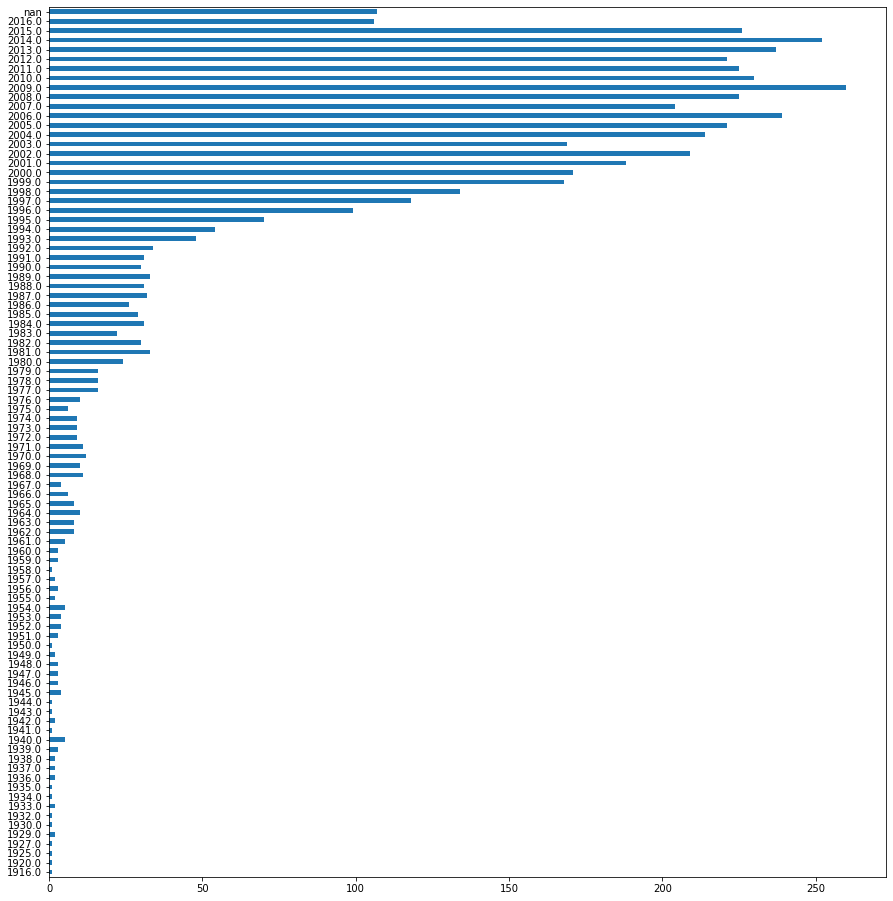

In [5]:
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

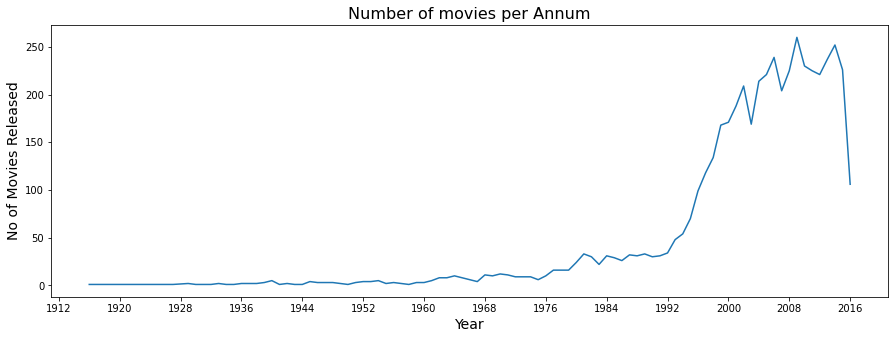

In [6]:
year_counts = data[["movie_title", "title_year"]].groupby("title_year").size()

fig, ax = plt.subplots(figsize=(15, 5)) 
ax.plot(year_counts.index, year_counts.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # changes the number of xticks we see
plt.title("Number of movies per Annum", fontsize=16)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("No of Movies Released", fontsize=14)
plt.show()

### Popular director 

In [7]:
ddata=data.loc[:,['director_name','director_facebook_likes']]
pp=ddata.nlargest(10, ['director_facebook_likes'])
dff=list(pp['director_name'].unique())
dff

['Joseph Gordon-Levitt', 'Christopher Nolan', 'David Fincher']

<AxesSubplot:xlabel='director_facebook_likes', ylabel='director_name'>

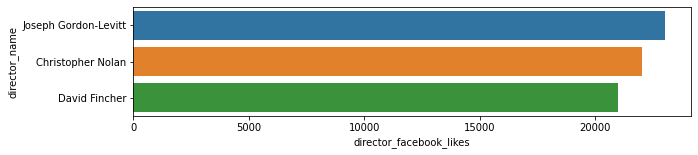

In [8]:
top5d=ddata.nlargest(10, ['director_facebook_likes'])
plt.figure(figsize=(10, 2))
sns.barplot(top5d["director_facebook_likes"],top5d['director_name'])

### Top 10 Movie with highest likes 

In [9]:
ldata=data.loc[:,['movie_title','movie_facebook_likes']]
ldata.nlargest(10, ['movie_facebook_likes'])

,movie_title,movie_facebook_likes
96,Interstellar,349000
296,Django Unchained,199000
10,Batman v Superman: Dawn of Justice,197000
128,Mad Max: Fury Road,191000
179,The Revenant,190000
97,Inception,175000
99,The Hobbit: An Unexpected Journey,166000
2614,The Imitation Game,165000
3,The Dark Knight Rises,164000
278,The Martian,153000


<AxesSubplot:xlabel='movie_facebook_likes', ylabel='movie_title'>

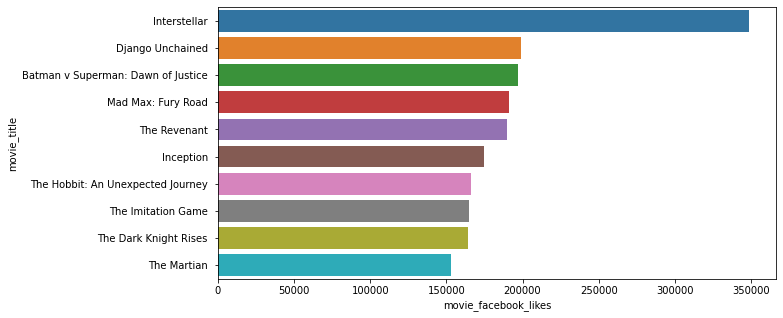

In [10]:
top10l=ldata.nlargest(10, ['movie_facebook_likes'])
plt.figure(figsize=(10, 5))
sns.barplot(top10l["movie_facebook_likes"],top10l['movie_title'])

### Top 10 Movie with highest IMDB ratings 

In [11]:
rdata=data.loc[:,['movie_title','imdb_score']]
rdata.nlargest(10, ['imdb_score'])

,movie_title,imdb_score
2765,Towering Inferno,9.5
1937,The Shawshank Redemption,9.3
3465,The Godfather,9.2
3206,Dekalog,9.1
4408,Kickboxer: Vengeance,9.1
66,The Dark Knight,9.0
2836,The Godfather: Part II,9.0
3480,Fargo,9.0
339,The Lord of the Rings: The Return of the King,8.9
1874,Schindler's List,8.9


<AxesSubplot:xlabel='imdb_score', ylabel='movie_title'>

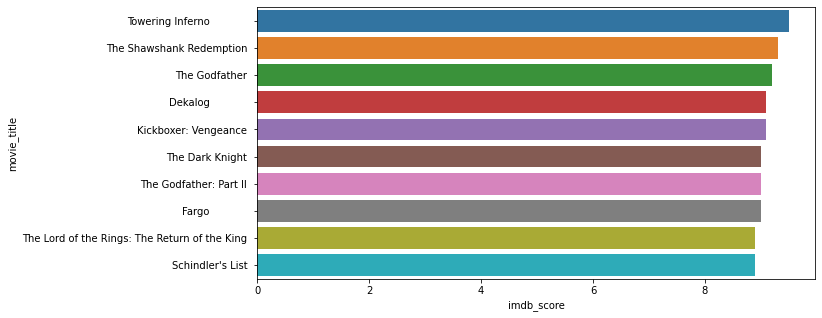

In [12]:
top10=rdata.nlargest(10, ['imdb_score'])
plt.figure(figsize=(10, 5))
sns.barplot(top10["imdb_score"],top10['movie_title'])

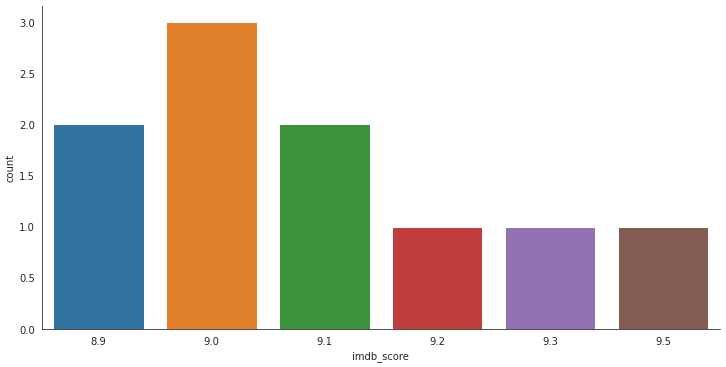

In [13]:
with sns.axes_style('white'):
    g = sns.factorplot("imdb_score", data=top10, aspect=2,
                       kind="count")
    g.set_xticklabels(step=1)

### 5 Movies with lowest ratings 

In [14]:
rdata.nsmallest(5, ['imdb_score'])

,movie_title,imdb_score
2833,Justin Bieber: Never Say Never,1.6
1136,Foodfight!,1.7
2268,Disaster Movie,1.9
2295,Superbabies: Baby Geniuses 2,1.9
4604,The Helix... Loaded,1.9


### Top 10 movie that got review from users 

In [15]:
r1data=data.loc[:,['movie_title','num_user_for_reviews']]
top10r=r1data.nlargest(10, ['num_user_for_reviews'])
top10r

,movie_title,num_user_for_reviews
270,The Lord of the Rings: The Fellowship of the R...,5060.0
66,The Dark Knight,4667.0
1937,The Shawshank Redemption,4144.0
654,The Matrix,3646.0
240,Star Wars: Episode I - The Phantom Menace,3597.0
237,Star Wars: Episode II - Attack of the Clones,3516.0
4706,The Blair Witch Project,3400.0
236,Star Wars: Episode III - Revenge of the Sith,3286.0
339,The Lord of the Rings: The Return of the King,3189.0
0,Avatar,3054.0


<AxesSubplot:xlabel='num_user_for_reviews', ylabel='movie_title'>

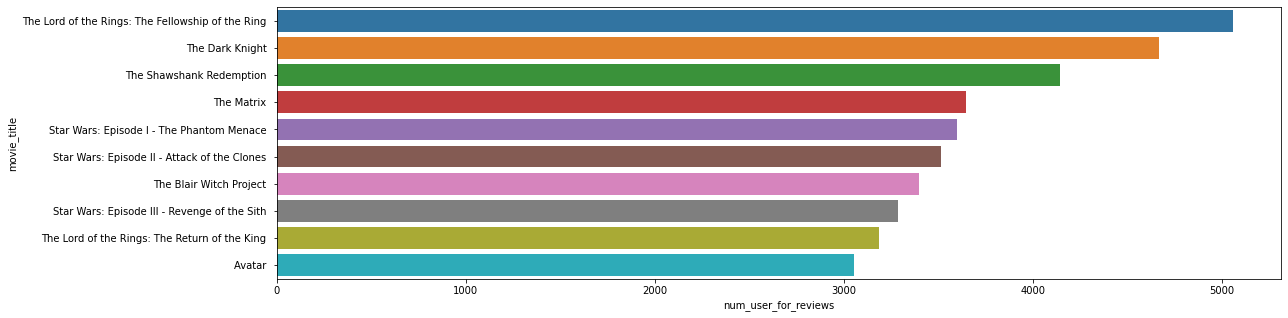

In [16]:
plt.figure(figsize=(18, 5))
sns.barplot(top10r["num_user_for_reviews"],top10r['movie_title'])

### Correlation betwwen the attributes

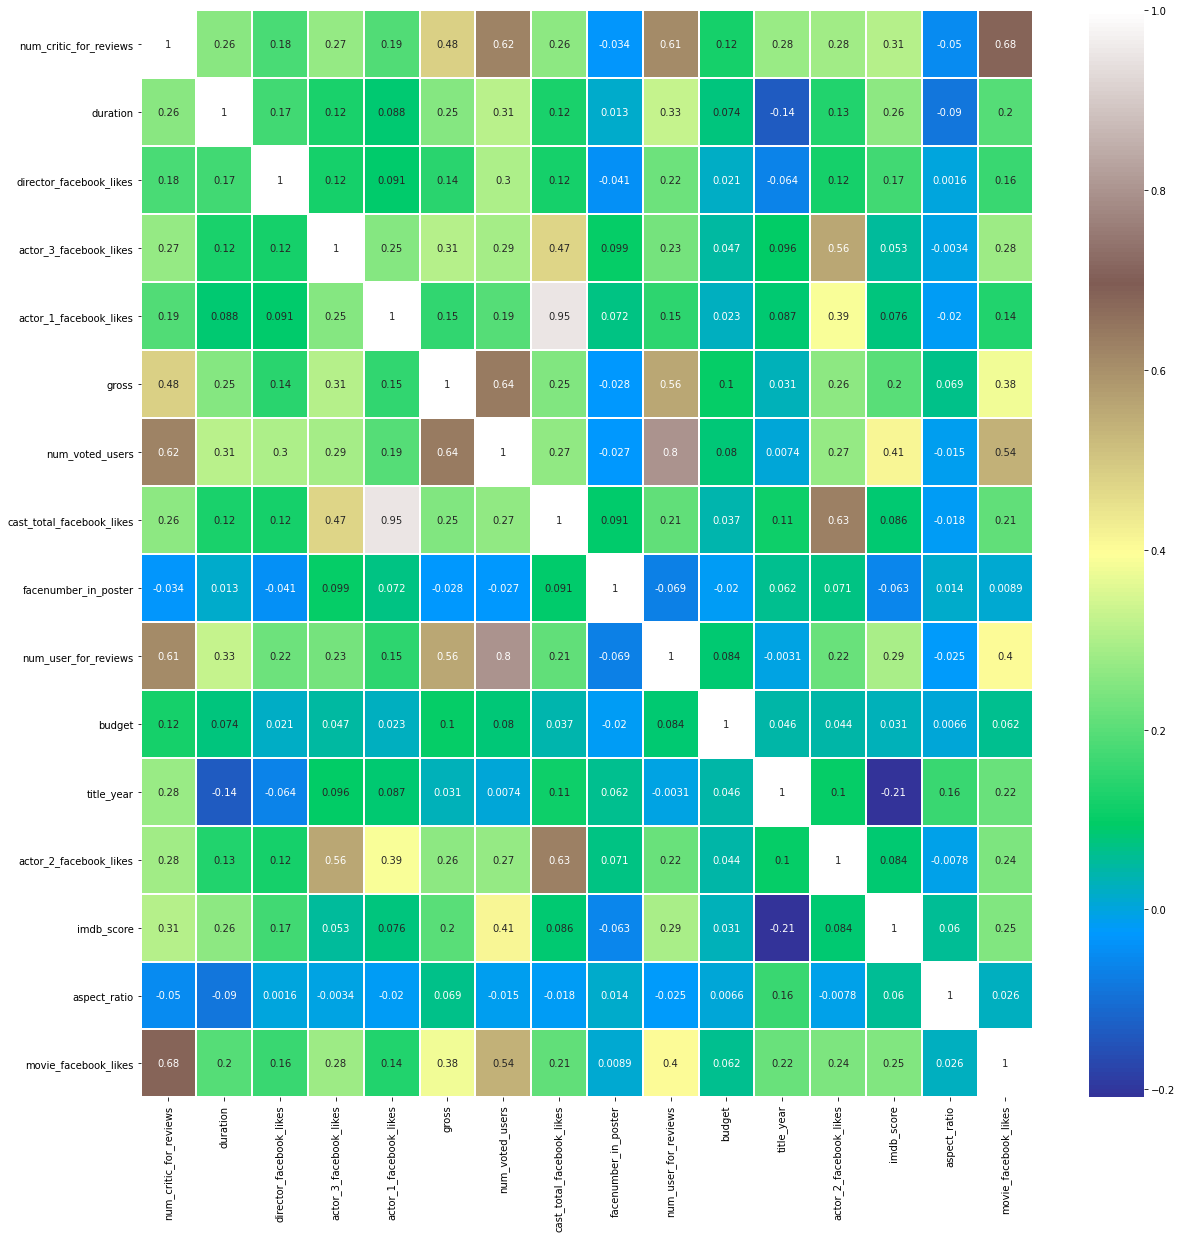

In [17]:
sns.heatmap(data.corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

### Correlation wrt facebook likes 

<AxesSubplot:title={'center':'Correlation Bar Plot'}>

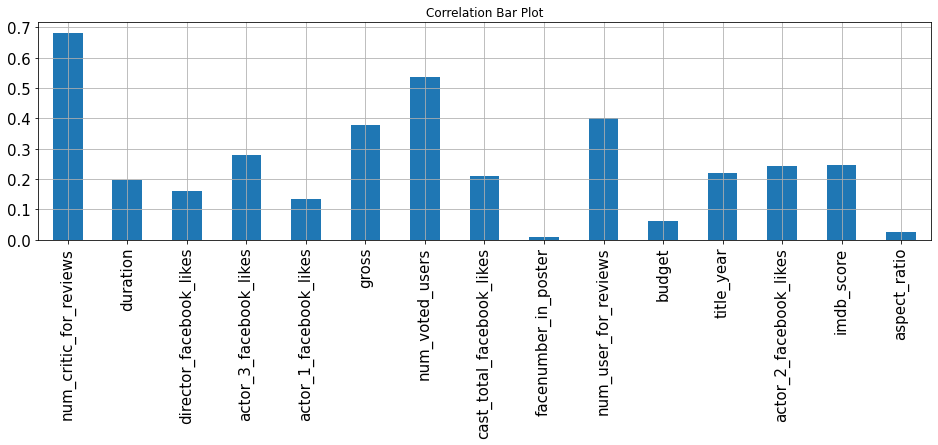

In [18]:
x,y=data.loc[:,:'aspect_ratio'],data['movie_facebook_likes']
x.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation Bar Plot", fontsize = 15,
        rot = 90, grid = True)

### Types of movie (Color & B/W) 

Text(0.5, 1.0, 'Types of Movie')

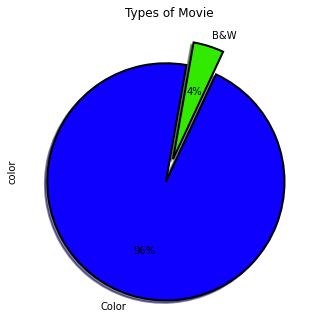

In [19]:
plt.figure(figsize=(18,12))
plt.subplot(221)
data["color"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 80,labels=["Color","B&W"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Types of Movie")

Similarly we can vizualize many other things depending on the attributes